# Product Classification and Image recognition 


In [18]:
import pandas as pd

data_URL = 'https://raw.githubusercontent.com/Ariamestra/DataScience/main/Products/products.csv'
df = pd.read_csv(data_URL)
print(f"Shape: {df.shape}")
df.head()

Shape: (10667, 11)


,ID,brand,name,product_type,img,rating,dupes,description,shade_img,price_site,view_count
0,1,Butter London,Handbag Holiday Cutile Oil,\nTreatment\n,NaN,NaN,NaN,"With added vitamins A and E, this heavenly-sme...",NaN,NaN,0
1,2,Butter London,LIPPY,\nLipgloss\n,NaN,NaN,NaN,Lippy: British slang for someone who makes imp...,"[{""shade"":""Come to Bed Red"",""img"":""https://www...",NaN,0
2,3,Butter London,Hardwear P.D. Quick Top Coat,\nTop Coat\n,NaN,NaN,NaN,"Lock your lacquer. butter LONDON's quick-dry, ...",NaN,NaN,0
3,4,Butter London,Horse Power Nail Fertilizer,\nTreatment\n,NaN,NaN,NaN,Reap what you sow. butter LONDON's Nail Fertil...,NaN,NaN,0
4,5,Butter London,Kitten Heels Powder Finish Foot Creme,\nCream\n,NaN,NaN,NaN,"Kitten Heels, our miraculous Powder Finish Foo...",NaN,NaN,0


In [19]:
print(f"Columns: {df.columns}")
print ('-'*100)

print(f"Info: {df.info()}")
print ('-'*100)

Columns: Index(['ID', 'brand', 'name', 'product_type', 'img', 'rating', 'dupes',
       'description', 'shade_img', 'price_site', 'view_count'],
      dtype='object')
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10667 entries, 0 to 10666
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            10667 non-null  int64  
 1   brand         10667 non-null  object 
 2   name          10667 non-null  object 
 3   product_type  10655 non-null  object 
 4   img           1194 non-null   object 
 5   rating        0 non-null      float64
 6   dupes         0 non-null      float64
 7   description   10667 non-null  object 
 8   shade_img     6547 non-null   object 
 9   price_site    1 non-null      object 
 10  view_count    10667 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 916.8+ KB


#### Feature Engineering

In [20]:
# Keep only the 'ID', 'brand', 'name', 'product_type' columns
df_reduced = df[['ID', 'brand', 'name', 'product_type', 'shade_img']]

print(df_reduced.head())
print ('-'*100)
print(f"Info: {df_reduced.info()}")

   ID          brand                                   name   product_type  \
0   1  Butter London             Handbag Holiday Cutile Oil  \nTreatment\n   
1   2  Butter London                                  LIPPY   \nLipgloss\n   
2   3  Butter London           Hardwear P.D. Quick Top Coat   \nTop Coat\n   
3   4  Butter London            Horse Power Nail Fertilizer  \nTreatment\n   
4   5  Butter London  Kitten Heels Powder Finish Foot Creme      \nCream\n   

                                           shade_img  
0                                                NaN  
1  [{"shade":"Come to Bed Red","img":"https://www...  
2                                                NaN  
3                                                NaN  
4                                                NaN  
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10667 entries, 0 to 10666
Data columns (total 5 co

#### Data Cleaning

In [21]:
# Remove all rows with any NaN values
df_cleaned = df_reduced.dropna()
print(df_cleaned.head())

print ('-'*100)
print(f"Info: {df_cleaned.info()}")

    ID          brand                          name           product_type  \
1    2  Butter London                         LIPPY           \nLipgloss\n   
9   10  Butter London                  Nail Lacquer         \nNail Color\n   
19  20    Bobbi Brown                         Blush             \nPowder\n   
20  21    Bobbi Brown  Brightening Finishing Powder  \nPressed Finishing\n   
21  22    Bobbi Brown         Brightening Lip Gloss           \nLipgloss\n   

                                            shade_img  
1   [{"shade":"Come to Bed Red","img":"https://www...  
9   [{"shade":"Aston","img":"https://www.temptalia...  
19  [{"shade":"Almond","img":"https://www.temptali...  
20  [{"shade":"Nudes","img":"https://www.temptalia...  
21  [{"shade":"Nectar","img":"https://www.temptali...  
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 6546 entries, 1 to 10666
Data columns (total 5 co

#### Label Encoding: If your classification features are categorical, you would convert them to a numerical format that a machine learning algorithm can work with

In [22]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'brand' column
df_cleaned['brand_encoded'] = le.fit_transform(df_cleaned['brand'])

# Encode the 'product_type' column
df_cleaned['product_type_encoded'] = le.fit_transform(df_cleaned['product_type'])

# The first few rows of the DataFrame with encoded labels are as follows:
print(df_cleaned.head())


    ID          brand                          name           product_type  \
1    2  Butter London                         LIPPY           \nLipgloss\n   
9   10  Butter London                  Nail Lacquer         \nNail Color\n   
19  20    Bobbi Brown                         Blush             \nPowder\n   
20  21    Bobbi Brown  Brightening Finishing Powder  \nPressed Finishing\n   
21  22    Bobbi Brown         Brightening Lip Gloss           \nLipgloss\n   

                                            shade_img  brand_encoded  \
1   [{"shade":"Come to Bed Red","img":"https://www...             46   
9   [{"shade":"Aston","img":"https://www.temptalia...             46   
19  [{"shade":"Almond","img":"https://www.temptali...             39   
20  [{"shade":"Nudes","img":"https://www.temptalia...             39   
21  [{"shade":"Nectar","img":"https://www.temptali...             39   

    product_type_encoded  
1                     51  
9                     70  
19               

/tmp/ipykernel_30760/4236369045.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['brand_encoded'] = le.fit_transform(df_cleaned['brand'])
/tmp/ipykernel_30760/4236369045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['product_type_encoded'] = le.fit_transform(df_cleaned['product_type'])


#### Data Visualization

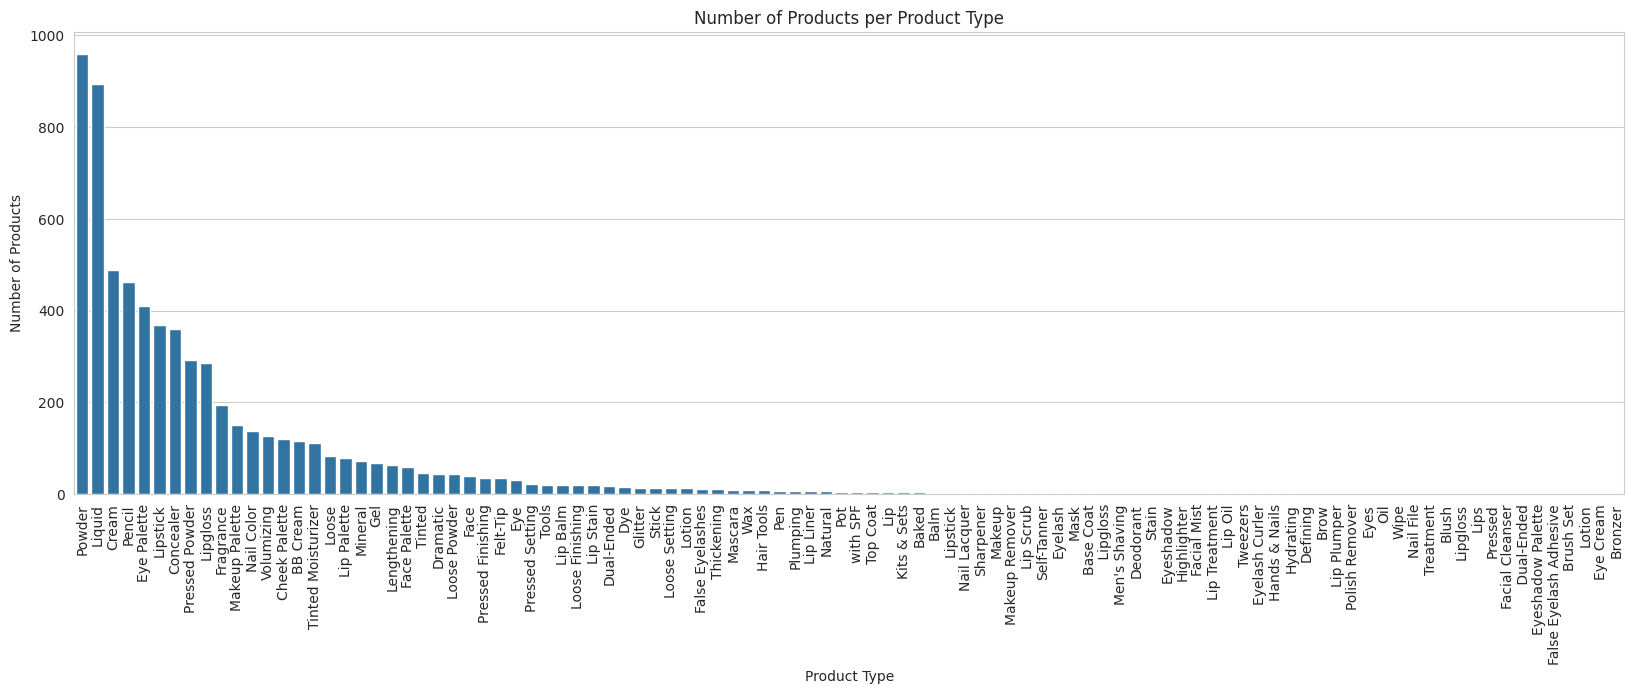

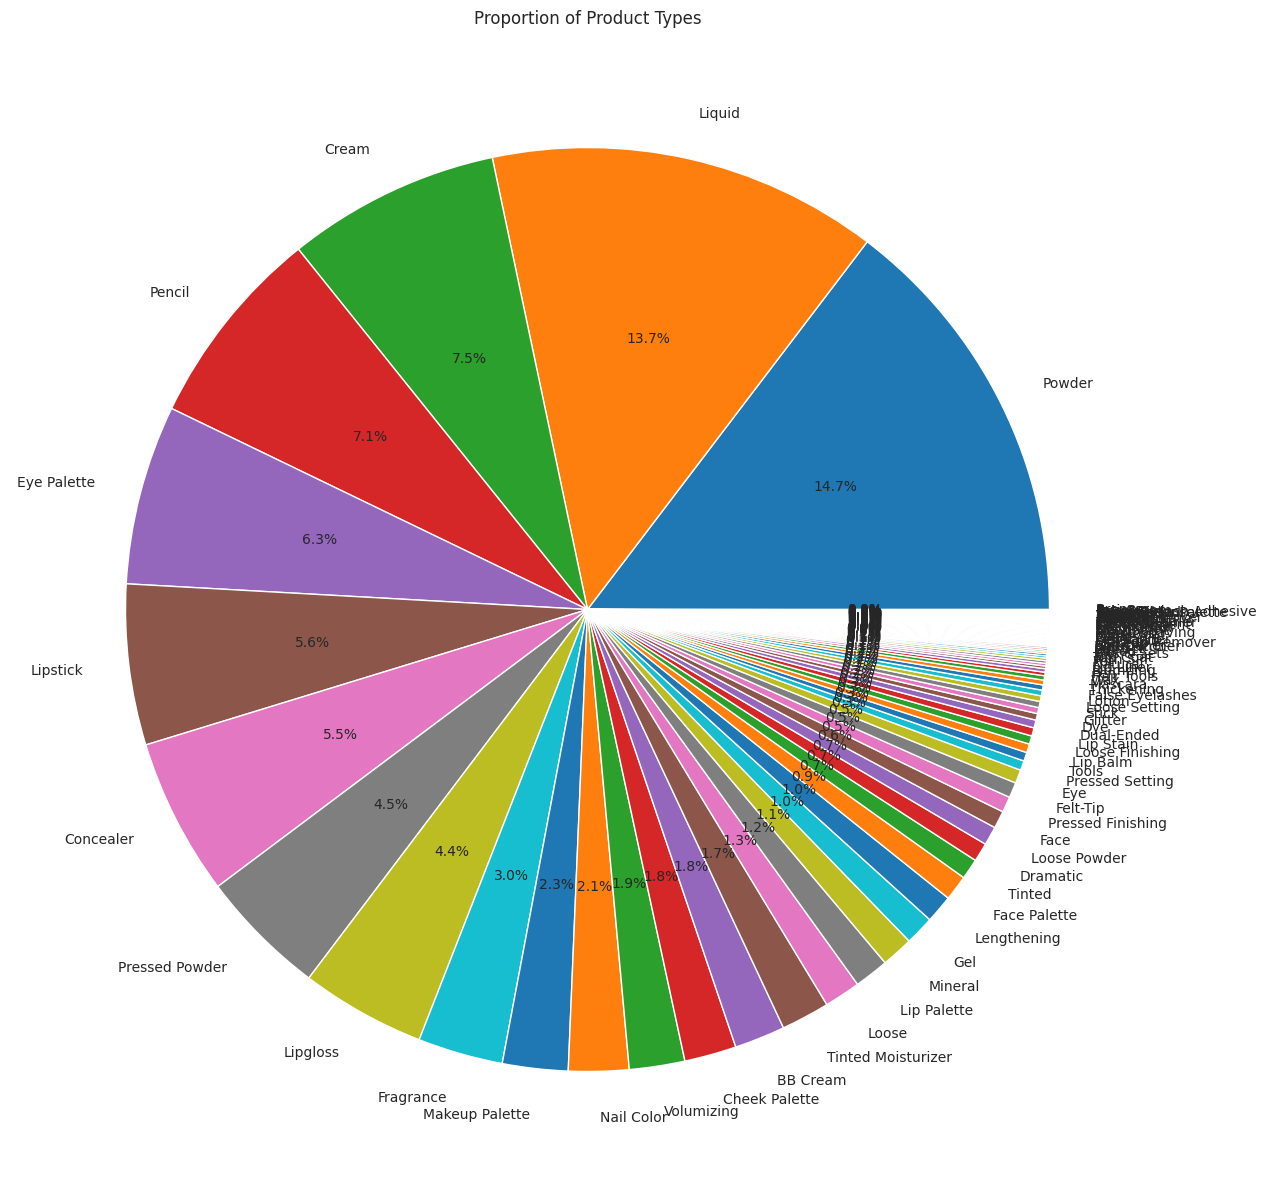

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Number of products per product type
plt.figure(figsize=(20, 6))
type_counts = df_cleaned['product_type'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Number of Products per Product Type')
plt.xlabel('Product Type')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.show()

# Proportion of each product type
plt.figure(figsize=(15, 15))
type_counts.plot.pie(autopct='%1.1f%%')
plt.title('Proportion of Product Types')
plt.ylabel('')
plt.show()




#### Data splitting

In [26]:
'''
from sklearn.model_selection import train_test_split

df_cleaned['target'] = le.fit_transform(df_cleaned['name'])  # Mock target variable

X = df_cleaned[['brand_encoded', 'product_type_encoded']]
y = df_cleaned['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''
!pip install tensorflow

import numpy as np
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Assuming X is your image data and y are your labels
# X should be a 4D array (number of images, height, width, channels)
# y should be a 1D array of labels

num_classes = len(np.unique(y))

# Normalize the image data
X = X.astype('float32')
X /= 255

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

# Evaluate the model
scores = model.evaluate(X_test, y_test)
print(f"Testing Accuracy: {scores[1]}")

# Assuming X is your image data and y are your labels
# X should be a 4D array (number of images, height, width, channels)
# y should be a 1D array of labels

# Normalize the image data
X = X.astype('float32')
X /= 255

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

# Evaluate the model
scores = model.evaluate(X_test, y_test)
print(f"Testing Accuracy: {scores[1]}")


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


ValueError: Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 2)

#### Model Selection & Training 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import numpy as np

param_grid = {
    'n_estimators': [75],  # If you only want to test with 75 estimators
    'max_depth': [5]       # If you only want to test with max_depth of 5
}

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator found by the grid search
best_clf = grid_search.best_estimator_

# Predict on the training set and the test set
train_predictions = best_clf.predict(X_train)
test_predictions = best_clf.predict(X_test)

# Calculate the accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Output the training and testing accuracies
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Cross-validated score on the best estimator
cross_val_scores = cross_val_score(best_clf, X_train, y_train, cv=5)
print(f"Mean cross-validation score: {np.mean(cross_val_scores)}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV] END .......................max_depth=5, n_estimators=75; total time=   3.9s
[CV] END .......................max_depth=5, n_estimators=75; total time=   3.9s
[CV] END .......................max_depth=5, n_estimators=75; total time=   4.3s
[CV] END .......................max_depth=5, n_estimators=75; total time=   4.6s
[CV] END .......................max_depth=5, n_estimators=75; total time=   2.8s
Best parameters found:  {'max_depth': 5, 'n_estimators': 75}
Training Accuracy: 0.041412482402627876
Testing Accuracy: 0.012670107930549039


/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mean cross-validation score: 0.012787369377555655


#### Evaluation 
Accuraccy Values are very low, which suggests that the model is not learning from the data. To better I would try different vales for max_depth and n_estimators but the kernal crashes If I try more values.
